In [24]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
from sklearn.mixture import GaussianMixture


In [25]:
#file = 'preped_som_rfls.pickle'
file = r'/Users/varunpatro/Desktop/preped_som_rfls.pickle'

In [26]:
spectra = pickle.load(open(file, 'rb'))

In [27]:
def expand_spectra(spectra_list:np.array) -> np.array:
    display = np.empty((spectra_list.shape[0], 425))
    display[:] = np.nan
    
    display[:, 0:181] = spectra_list[:,0:181]
    display[:, 230:275] = spectra_list[:,188:233]
    display[:, 329:420] = spectra_list[:,233:324]
    
    return display

In [28]:
spectra['20220224'].shape

(80, 100, 335)

In [29]:
time_1 = spectra['20220224'].copy()
time_1_reshapen = time_1.reshape((time_1.shape[0]*time_1.shape[1],335))

In [30]:
seed = 8
gmm_4 = GaussianMixture(n_components=4, init_params = 'k-means++', random_state=seed).fit(time_1_reshapen)


In [31]:
labels = gmm_4.predict(time_1_reshapen)
means_4 = gmm_4.means_

In [33]:
labels.shape

(8000,)

In [34]:
counts = np.bincount(labels)
print(counts)

[1303  514 4573 1610]


In [35]:
means_4.shape

(4, 335)

In [36]:
display = expand_spectra(means_4.copy())

Text(0.5, 1.0, 'Gaussian Mixture Model: 4 Components')

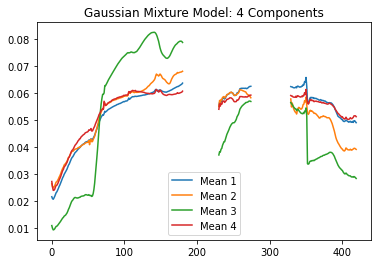

In [37]:
for i in range(display.shape[0]):
    plt.plot(display[i], label = 'Mean ' + str(i+1))
plt.legend()
plt.title('Gaussian Mixture Model: 4 Components')

In [38]:
rgb_t1 = np.zeros((time_1.shape[0]*time_1.shape[1], 335))

for i in range(len(labels)): # 8000 times
    if labels[i] == 0:
        rgb_t1[i] = means_4[0]
    elif labels[i] == 1:
        rgb_t1[i] = means_4[1]
    elif labels[i] == 2:
        rgb_t1[i] = means_4[2]
    else:
        rgb_t1[i] = means_4[3]
        
    

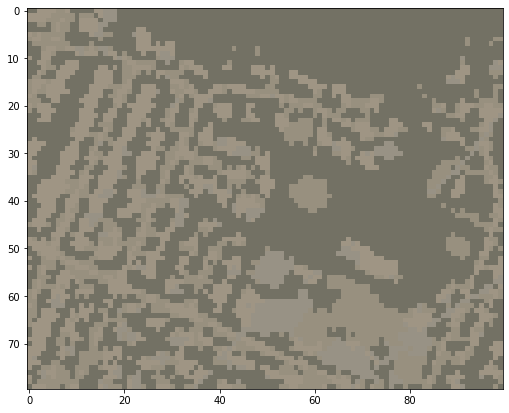

In [39]:
rgb_t1 = rgb_t1.reshape((80,100,335))

fig = plt.figure(figsize = (12, 7))
r = rgb_t1[:,:,54]
g = rgb_t1[:,:,34]
b = rgb_t1[:,:,16]
img = np.dstack((r, g, b))*10
plt.imshow(img);

z = np.ones((rgb_t1.shape[0], rgb_t1.shape[1]))
img = np.dstack((z, z, z))
plt.imshow(img, alpha = 0.3)

In [43]:
labels.shape

(8000,)

In [58]:
seed = 8
# Running kmeans through all time points in time series
gmm_tpoint_labels = []
gmm_tpoint_counts = []
inits = []
count = 0
for i in spectra.keys():
    time_point = spectra[i].copy()
    time_point_reshapen = time_point.reshape(time_point.shape[0]*time_point.shape[1], time_point.shape[2])
    if i == '20220224':
        gmm = GaussianMixture(n_components=4, init_params = 'k-means++', random_state=seed).fit(time_point_reshapen)
        labels = gmm.predict(time_point_reshapen)
        means = gmm.means_
        gmm_tpoint_labels.append(labels)
        inits.append(means)
        counts = np.bincount(labels)
        gmm_tpoint_counts.append(counts)
    else:
        #print('count: ', count)
        #print('inits: ', inits)
        gmm = GaussianMixture(n_components=4, means_init = inits[count-1]).fit(time_point_reshapen)
        labels = gmm.predict(time_point_reshapen)
        means = gmm.means_
        gmm_tpoint_labels.append(labels)
        inits.append(means)
        counts = np.bincount(labels)
        gmm_tpoint_counts.append(counts)
        
    count+= 1

In [59]:
inits = np.array(inits)

In [62]:
means_425 = np.empty((12,4,425))
means_425[:] = np.nan

means_425[:,:,0:181] = inits[:,:,0:181].copy()
means_425[:,:,230:275] = inits[:,:,188:233].copy()
means_425[:,:,329:420] = inits[:,:,233:324].copy()

Text(0.5, 1.0, 'Temporal Variation of Cluster 1')

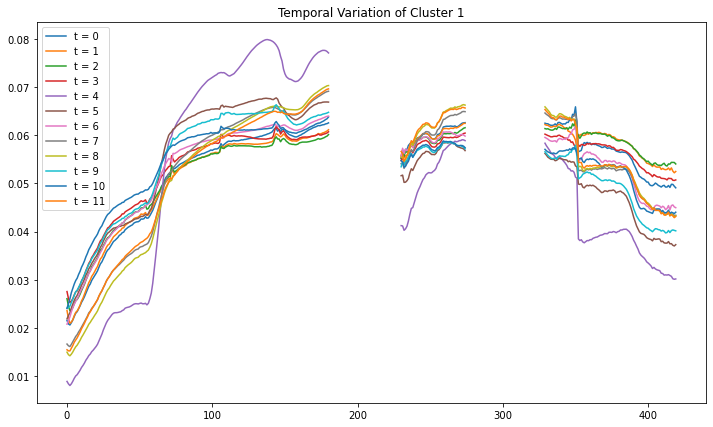

In [64]:
# plot mean 1 over time
    
plt.figure(figsize = (12,7))
for i in range(means_425.shape[0]):
    plt.plot(means_425[i][0], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 1')

Text(0.5, 1.0, 'Temporal Variation of Cluster 2')

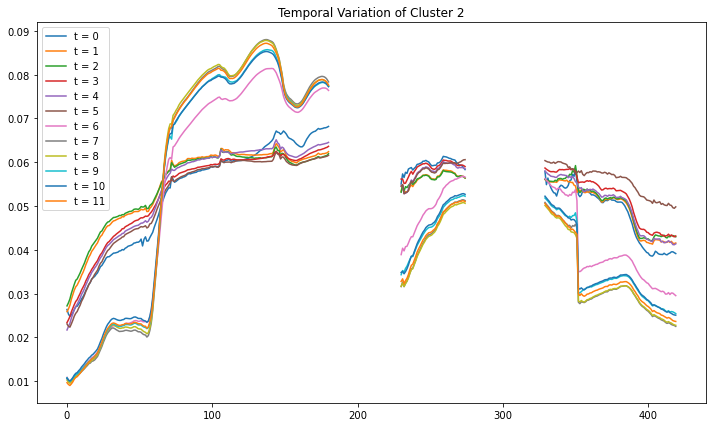

In [65]:
# plot mean 2 over time
    
plt.figure(figsize = (12,7))
for i in range(means_425.shape[0]):
    plt.plot(means_425[i][1], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 2')

Text(0.5, 1.0, 'Temporal Variation of Cluster 3')

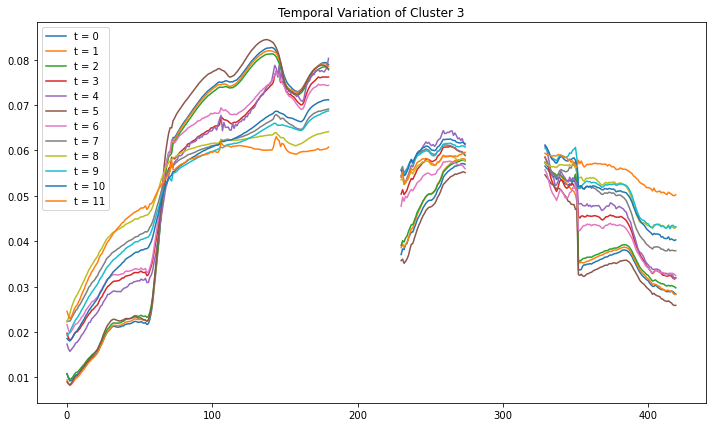

In [66]:
# plot mean 3 over time
    
plt.figure(figsize = (12,7))
for i in range(means_425.shape[0]):
    plt.plot(means_425[i][2], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 3')

Text(0.5, 1.0, 'Temporal Variation of Cluster 4')

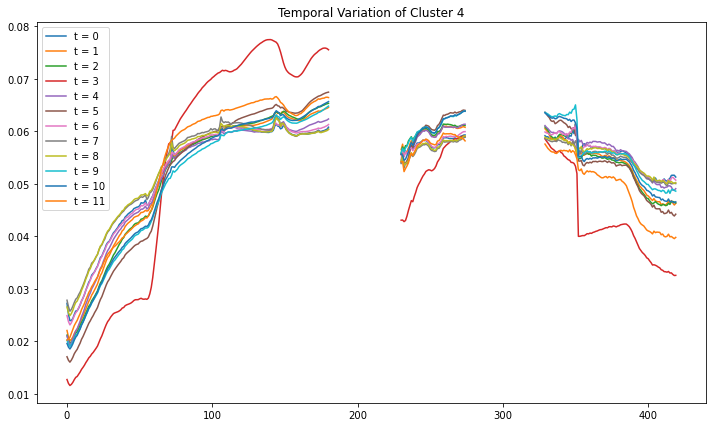

In [67]:
# plot mean 4 over time
    
plt.figure(figsize = (12,7))
for i in range(means_425.shape[0]):
    plt.plot(means_425[i][3], label = 't = ' + str(i))
plt.legend()
plt.title('Temporal Variation of Cluster 4')

In [70]:
gmm_tpoint_labels = np.array(gmm_tpoint_labels)

In [92]:
gmm_tpoint_labels.shape

(12, 8000)

In [93]:
gmm_tpoint_labels_reshapen = gmm_tpoint_labels.reshape((gmm_tpoint_labels.shape[0]*gmm_tpoint_labels.shape[1]))

In [95]:
gmm_tpoint_labels_reshapen

array([2, 2, 3, ..., 0, 1, 0])

In [96]:
spectral_assignments = np.zeros((gmm_tpoint_labels_reshapen.shape))

label_idx = [np.where(gmm_tpoint_labels_reshapen == i) for i in range(4)]

In [98]:
type(label_idx[0])

tuple

(96000,)